In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

In [17]:
#데이터 불러오기
data = pd.read_csv("./data/treatment_data.csv")
print(data)

#두 변수 간의 차이 검정
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])
print(stat, p)

    pre_treatment  post_treatment
0               3              -3
1               9               0
2               4               3
3               8              -2
4               5               0
5               5              -3
6               7               2
7               7               0
8               7               1
9               4              -2
10              1               0
11              9               3
12              9               2
13              6               2
14              1              -3
15              5               0
16              1              -3
17              4               3
18              4               2
19              2               1
0.0 1.9073486328125e-06


Different distribution


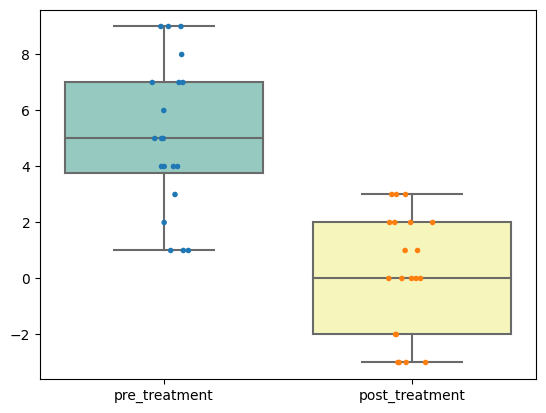

In [18]:
#검정 결과 시각화

sns.boxplot(data=data[['pre_treatment','post_treatment']], palette="Set3")
sns.stripplot(data=data[['pre_treatment','post_treatment']], size=4)
if p > 0.05 :
    print("Same distribution")
else :
    print("Different distribution")

In [19]:
data = {'group1': [3,2,5,1,4,2,6,7,9,8],
       'group2' : [6,4,7,2,6,3,7,9,10,11]}

df = pd.DataFrame(data)
print(df)
df.to_csv('./data/Mann_Whitney-Test_sample_data.csv', index=False)

   group1  group2
0       3       6
1       2       4
2       5       7
3       1       2
4       4       6
5       2       3
6       6       7
7       7       9
8       9      10
9       8      11


In [20]:
#데이터 불러오기
data = pd.read_csv('./data/Mann_Whitney-Test_sample_data.csv')

#두 집단 간의 차이 검정
stat, p = mannwhitneyu(data['group1'], data['group2'])

#결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05 :
    print("fail to reject HO")
else :
    print("reject HO")

Statistic: 32.5
p-value: 0.19622288836173518
fail to reject HO


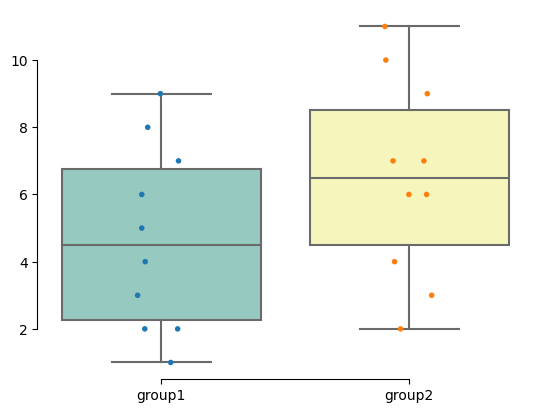

In [22]:
#시각화

sns.boxplot(data=data[['group1','group2']], palette='Set3')
sns.stripplot(data=data[['group1', 'group2']], size=4)
sns.despine(trim=True)
plt.show()

In [29]:
from scipy.stats import levene

In [30]:
#데이터 불러오기
data = pd.read_csv("./data/Mann_Whitney-Test_sample_data.csv")
print(data)

   group1  group2
0       3       6
1       2       4
2       5       7
3       1       2
4       4       6
5       2       3
6       6       7
7       7       9
8       9      10
9       8      11


In [34]:
#등분산성 검정
stat, p = levene(data['group1'],data['group2'])
print(stat, p)
if p > 0.05 :
    print("fail to reject HO")
else :
    print("reject HO")

0.0 1.0
fail to reject HO


In [4]:
from scipy import stats

group1 = [3,2,5,1,4,2,6,7,9,8]
group2 = [6,4,7,2,6,3,7,9,10,11]

st, p = mannwhitneyu(group1, group2)

print(st, p)

32.5 0.19622288836173518


In [9]:
#데이터 불러오기
data = pd.read_csv("./data/Mann_Whitney-Test_sample_data.csv")

#두 집단 간의 차이 검정
st, p = mannwhitneyu(data['group1'], data['group2'])

print(st, p)

#두 집단의 크기 계산  # len()
n1, n2 = len(data['group1']), len(data['group2'])
print(n1, n2)

if st > n1 * n2 / 2 :
    st = n1 * n2 - st

#p-value 계산
p_val = 2 * stats.norm.cdf(-abs(st) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12))
print(st)
print(p_val)

32.5 0.19622288836173518
10 10
32.5
0.014019277113959953
